#SLEEP STUDY...

###In our project we will be training a dataset on the following:
1) Enough = Do you think that you get enough sleep?

---


2) Hours = On average, how many hours of sleep do you get on a weeknight?


---


3) PhoneReach = Do you sleep with your phone within arms reach?


---


4) PhoneTime = Do you use your phone within 30 minutes of falling asleep?


---


5) Tired = On a scale from 1 to 5, how tired are you throughout the day? (1 being not tired, 5 being very tired)


---


6) Breakfast = Do you typically eat breakfast?

#Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import permutations

#Importing Dataset

In [ ]:
dataset = pd.read_csv('SleepStudyData.csv')
# Hours
x = dataset.iloc[:, 1:2].values
# Tired
y = dataset.iloc[:, -2].values

#Handling missing data

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x[:, :])
x = imputer.transform(x[:, :]).round(1)

#Splitting dataset into Training and Test set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#Encoding categorical data

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dataset['Enough']= label_encoder.fit_transform(dataset['Enough'])
dataset['PhoneReach']= label_encoder.fit_transform(dataset['PhoneReach'])
dataset['PhoneTime']= label_encoder.fit_transform(dataset['PhoneTime'])
dataset['Breakfast']= label_encoder.fit_transform(dataset['Breakfast'])

#Plotting bar graph

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

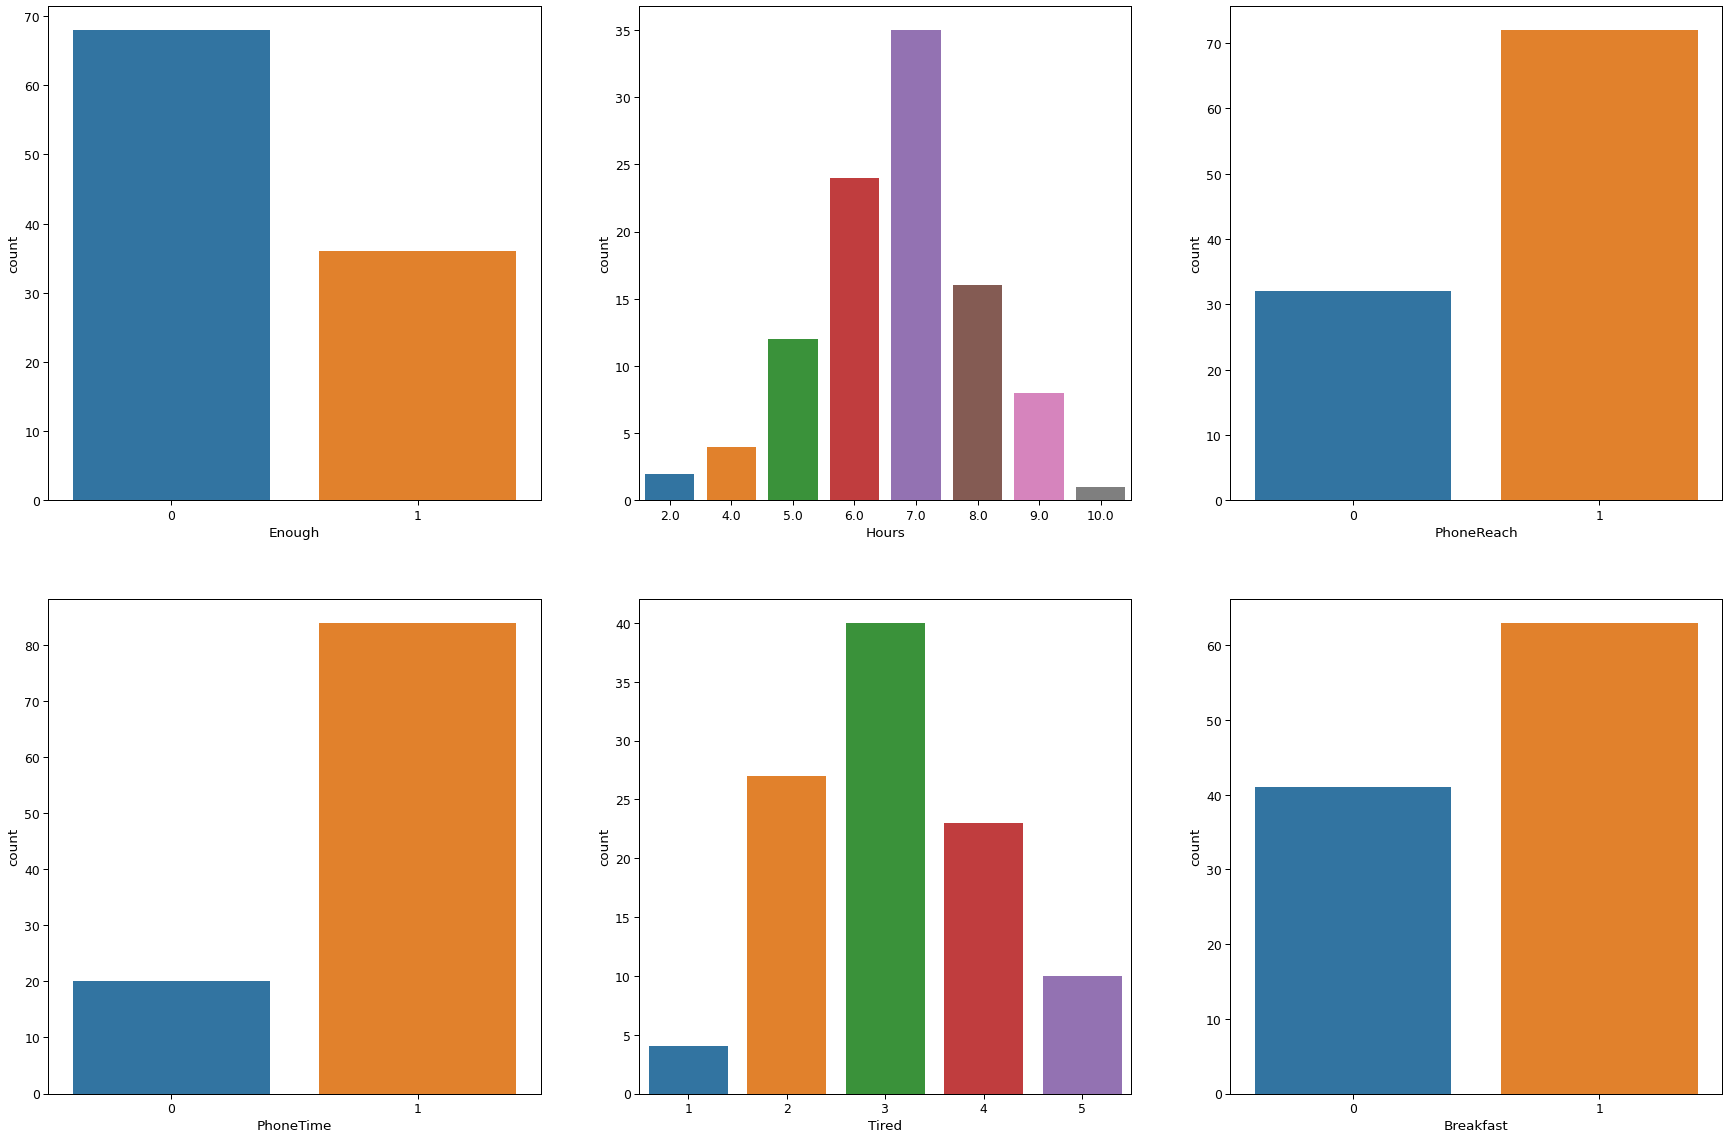

In [ ]:
plt.figure(figsize=(30,20))
for i, c in enumerate(dataset.columns):
    plt.subplot(2,3,i+1)
    sns.countplot(dataset[c])
plt.show()

#Plotting Pivot table

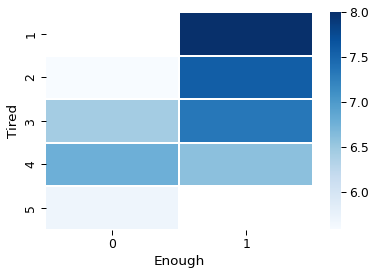

In [ ]:
sleep = dataset.pivot_table(index= 'Tired',columns = 'Enough',values='Hours')
sns.heatmap(sleep,cmap='Blues',linecolor='white',linewidth = 1)

#Data Frame

In [ ]:
output = pd.DataFrame(dataset)

#Correlation

In [ ]:
df1=output['Enough']

In [ ]:
df2=output['PhoneReach']
corr1=df1.corr(df2)
corr1=round(corr1,3)
print("Corr(X,Y)=",corr1)

Corr(X,Y)= -0.084


In [ ]:
df3=output['PhoneTime']
corr2=df1.corr(df3)
corr2=round(corr2,3)
print("Corr(X,Y)=",corr2)

Corr(X,Y)= -0.004


In [ ]:
df4=output['Tired']
corr3=df1.corr(df4)
corr3=round(corr3,3)
print("Corr(X,Y)=",corr3)

Corr(X,Y)= -0.417


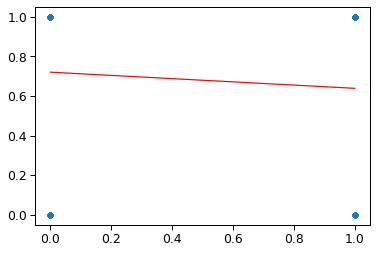

In [ ]:
plt.scatter(df1, df2)
plt.plot(np.unique(df1), np.poly1d(np.polyfit(df1, df2, 1))
        (np.unique(df1)), color='red')

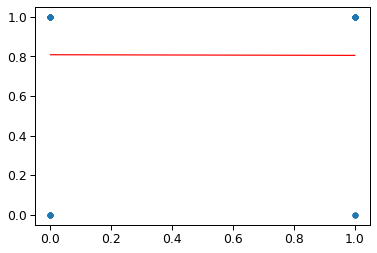

In [ ]:
plt.scatter(df1, df3)
plt.plot(np.unique(df1), np.poly1d(np.polyfit(df1, df3, 1))
         (np.unique(df1)), color='red')

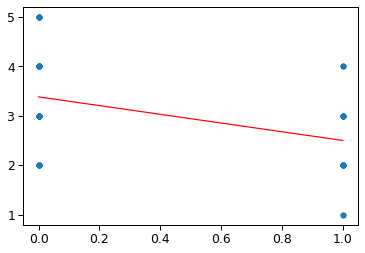

In [ ]:
plt.scatter(df1, df4)
plt.plot(np.unique(df1), np.poly1d(np.polyfit(df1, df4, 1))
         (np.unique(df1)), color='red')

#Heat Map

In [ ]:
new = np.random.RandomState(0)
corr = output.corr()
corr.style.background_gradient(cmap='coolwarm')

,Enough,Hours,PhoneReach,PhoneTime,Tired,Breakfast
Enough,1.000000,0.380740,-0.084214,-0.003945,-0.417006,0.132029
Hours,0.380740,1.000000,-0.054957,0.151378,-0.191913,0.225818
PhoneReach,-0.084214,-0.054957,1.000000,0.150451,-0.073232,-0.239392
PhoneTime,-0.003945,0.151378,0.150451,1.000000,-0.035423,0.005761
Tired,-0.417006,-0.191913,-0.073232,-0.035423,1.000000,-0.251096
Breakfast,0.132029,0.225818,-0.239392,0.005761,-0.251096,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

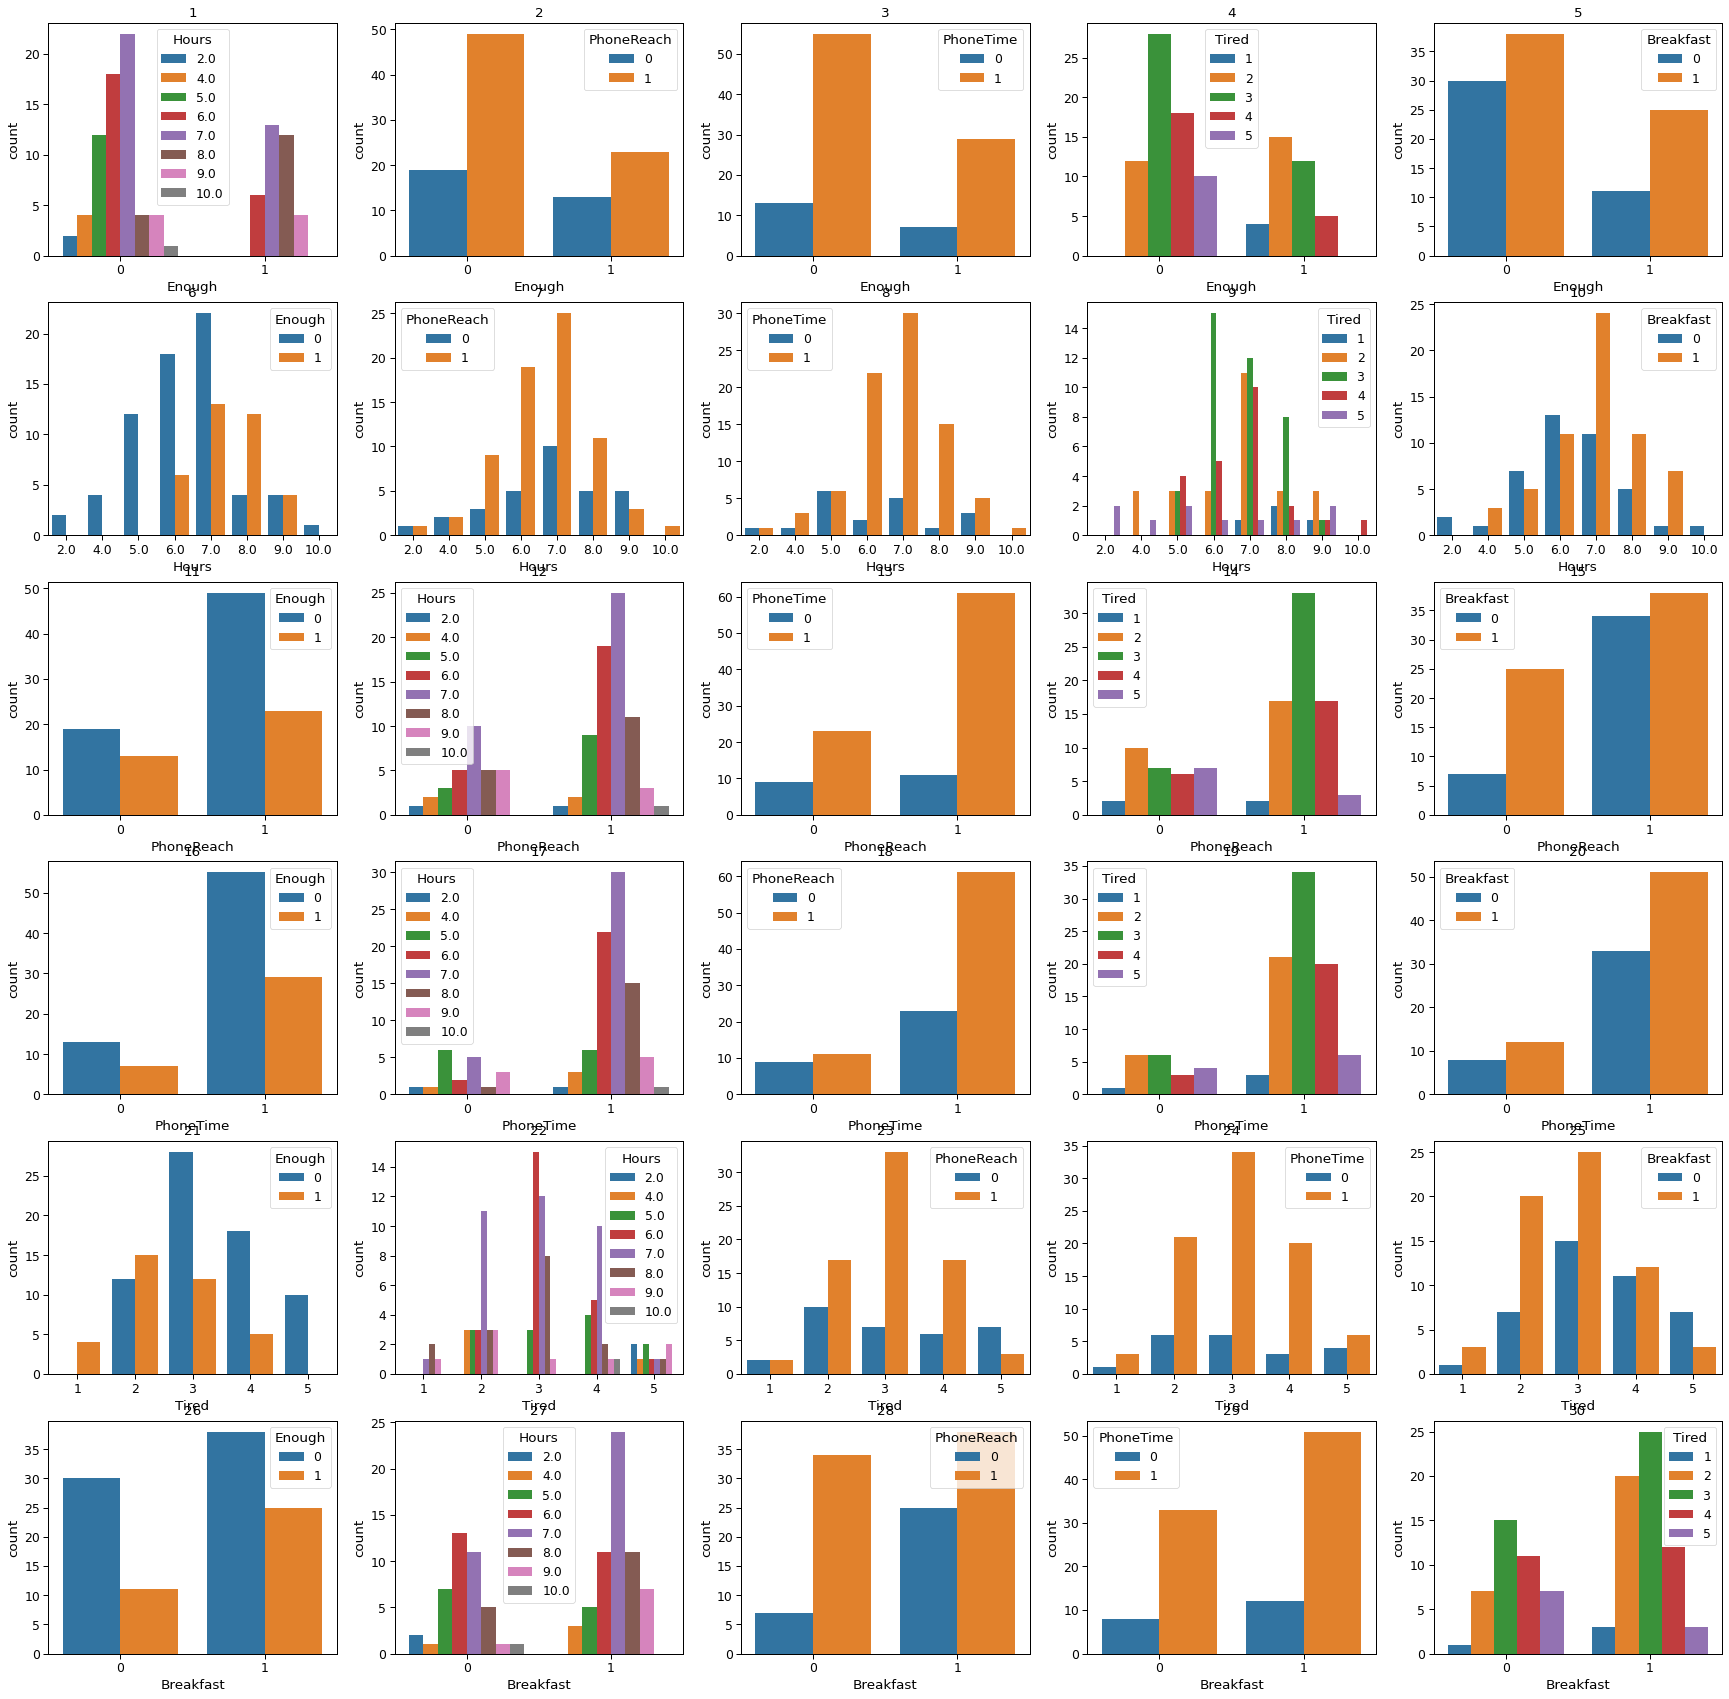

In [ ]:
column_permutations = permutations(dataset.columns,2)
plt.figure(figsize=(30,30))
for i, c in enumerate(column_permutations):
    plt.subplot(6,5,i+1)
    plt.title(i+1)
    sns.countplot(dataset[c[0]], hue=dataset[c[1]])
plt.show()

#Violinplot

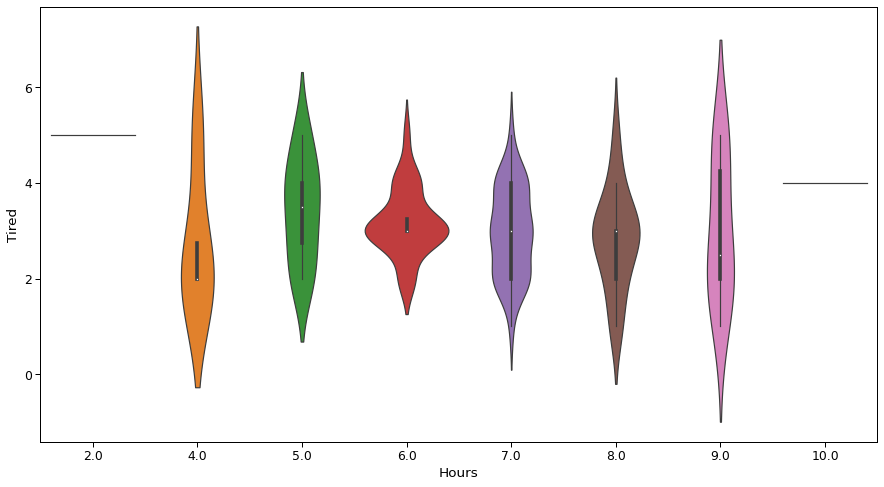

In [ ]:
plt.figure(figsize=(15,8))
sns.violinplot(x=dataset['Hours'], y=dataset['Tired'], data=dataset)

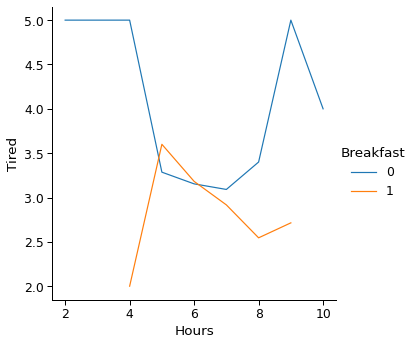

In [ ]:
sns.relplot(x="Hours", y="Tired", ci=None, kind="line", hue="Breakfast", data=dataset)
plt.show()

#Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [ ]:
print(y_pred)

[3.2368025  3.10241419 3.2368025  3.77435574 3.2368025  3.2368025
 3.2368025  3.10241419 3.2368025  3.10241419 3.10241419 3.10241419
 2.96802588 2.96802588 3.10241419 2.96802588 3.37119081 3.37119081
 3.2368025  3.50557912 3.2368025 ]


###Training Set

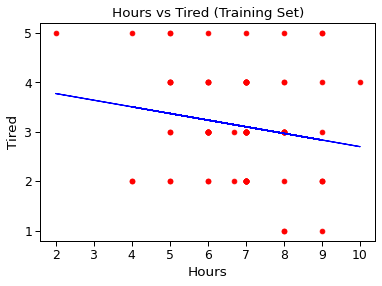

In [ ]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')

plt.title("Hours vs Tired (Training Set)")
plt.xlabel("Hours")
plt.ylabel("Tired")
plt.show()

###Test Set

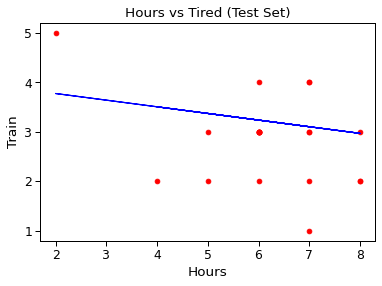

In [ ]:
plt.scatter(x_test, y_test, color = 'red')

plt.plot(x_test, y_pred, color = 'blue')

plt.title("Hours vs Tired (Test Set)")
plt.xlabel("Hours")
plt.ylabel("Train")
plt.show()

#lamplot graph

<Figure size 576x432 with 0 Axes>

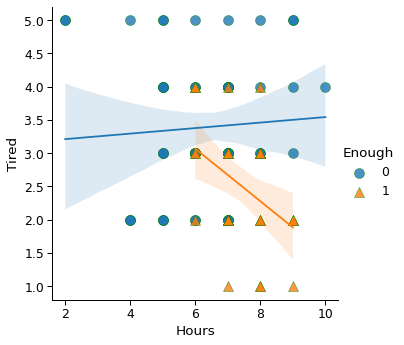

In [ ]:
plt.figure(figsize=(8,6))
sns.set_context('paper',font_scale=1.4)
sns.lmplot(x='Hours',y='Tired',hue='Enough',data=dataset,markers =['o','^'],
          scatter_kws={'s':100,'linewidth':0.5,'edgecolor':'green'})

From the above analysarion and visualization we can conclude, A person who sleeps Better i.e. in between 6 to 8 hours and has Breakfast are less Tired than who doesn't. Sleeping more than that rage and less than that range has more Tired Rate.
It is mandatory for people to have an accurate sleep for their better mental and physical health.


---
There are always just vague statements that we need to sleep adequately but we did the analysis and proved how sleep is dependable on may factors. The visualization make the analysis more user friendly.
